https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?resourcekey=0-wjGZdNAUop6WykTtMip30g

In [2]:
# !pip install pandas --user
# !pip install gensim --user
# !pip install scikit-learn --user
# pip3 install -U scikit-learn scipy matplotlib
# !pip install scikit-learn --user
# !pip install gensim==3.4.0
# !pip install smart_open==1.9.0
# !pip install matplotlib

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

import smart_open
from gensim.models.keyedvectors import KeyedVectors

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

from sklearn.metrics import classification_report

In [4]:
# path = 'GoogleNews-vectors-negative300.bin.gz'
# model = KeyedVectors.load_word2vec_format(path, binary=True)

In [5]:
# Cargar el dataset
df = pd.read_csv('career_prediction_dataset.csv')
print(df)

     O_score  C_score  E_score  A_score  N_score  Numerical Aptitude  \
0       5.45     8.67     3.45     5.34     4.23                9.23   
1       8.78     5.67     4.56     6.45     4.23                5.12   
2       6.12     6.78     9.34     7.56     5.01                6.23   
3       9.12     8.78     4.23     5.67     4.56                7.89   
4       6.45     7.56     5.67     9.12     4.23                5.34   
..       ...      ...      ...      ...      ...                 ...   
100     7.67     8.23     6.01     9.12     5.45                4.45   
101     2.67     8.78     7.67     8.45     6.45                4.45   
102     6.78     8.67     4.23     5.23     4.67                8.23   
103     7.34     7.67     4.23     5.23     4.67                9.34   
104     7.34     7.67     4.23     5.45     4.89                9.12   

     Spatial Aptitude  Perceptual Aptitude  Abstract Reasoning  \
0                4.56                 6.78                7.89   
1  

In [6]:
categories = {
    "Healthcare and Medicine": [
        "Nurse", "Physician", "Pharmacist", "Physical Therapist", 
        "Dental Hygienist", "Pediatric Nurse", "Chiropractor", 
        "Radiologic Technologist", "Speech Therapist", "Occupational Therapist", 
        "Rehabilitation Counselor", "Pediatrician", "Genetic Counselor", 
        "Forensic Psychologist", "Public Health Analyst"
    ],
    "Engineering and Technology": [
        "Software Developer", "IT Support Specialist", "Biomedical Engineer", 
        "Data Analyst", "Industrial Engineer", "Mechanical Engineer", 
        "Environmental Engineer", "Electrical Engineer", "Aerospace Engineer", 
        "Mechanical Designer", "Robotics Engineer", "Civil Engineer", 
        "Electronics Design Engineer", "Web Developer", "Quality Control Inspector", 
        "Video Game Tester", "Game Developer", "IT Project Manager", "Database Analyst", "Software Quality Assurance Tester", "Database Administrator"
    ],
    "Science and Research": [
        "Research Scientist", "Biologist", "Astronomer", "Environmental Scientist", 
        "Biotechnologist", "Zoologist", "Forensic Scientist", "Geologist", 
        "Wildlife Biologist", "Marine Biologist", "Biomedical Researcher"
    ],
    "Business and Finance": [
        "Accountant", "Financial Analyst", "Financial Planner", "Financial Auditor", 
        "Financial Advisor", "Investment Banker", "Tax Accountant", "Insurance Underwriter", "Product Manager"
    ],
    "Marketing and Sales": [
        "Salesperson", "Marketing Manager", "Marketing Coordinator", "Event Planner", 
        "Real Estate Agent", "Market Research Analyst", "Marketing Copywriter", 
        "Social Media Manager", "Advertising Executive", "Public Relations Specialist", 
        "Market Researcher", "Event Photographer", "Chef", "Marketing Analyst"
    ],
    "Human Resources and Administration": [
        "Human Resources Manager", "HR Recruiter", "Administrative Officer", 
        "IT Project Manager"
    ],
    "Design and Creative Arts": [
        "Graphic Designer", "Architect", "Artist", "Fashion Designer", 
        "Musician", "Interior Designer", "Film Director", "Fashion Stylist", "Technical Writer"
    ],
    "Education and Counseling": [
        "Teacher", "Psychologist", "Elementary School Teacher", "Social Worker", 
        "Marriage Counselor", "Speech Pathologist", "Sports Coach", 
        "Rehabilitation Counselor", "Career Counselor"
    ],
    "Law and Public Safety": [
        "Lawyer", "Police Detective", "Police Officer", "Human Rights Lawyer", 
        "Customs and Border Protection Officer", "Diplomat", "Foreign Service Officer", 
        "Tax Collector", "Air Traffic Controller", "Airline Pilot", "Journalist"
    ],
    "Urban Planning and Environment": [
        "Urban Planner", "Construction Engineer", "Environmental Scientist", 
        "Environmental Engineer", "Forestry Technician", "Wildlife Conservationist"
    ]
}


inverse_categories = {v: k for k, values in categories.items() for v in values}

df['Field'] = df['Career'].apply(lambda x: inverse_categories[x] if x in inverse_categories else 'Other Specialized Fields')

In [7]:
# Codificación de la columna 'Career'
df['Career_encoded'] = LabelEncoder().fit_transform(df['Career'])
df['Field_encoded'] = LabelEncoder().fit_transform(df['Field'])

In [8]:
field_counts = df['Field'].value_counts()
sub_df = df[df['Field'].isin(field_counts[field_counts >= 7].index)]
sub_df.corr()

,O_score,C_score,E_score,A_score,N_score,Numerical Aptitude,Spatial Aptitude,Perceptual Aptitude,Abstract Reasoning,Verbal Reasoning,Career_encoded,Field_encoded
O_score,1.000000,-0.358852,-0.114397,-0.275814,0.030516,-0.116925,-0.001691,0.343582,0.390962,-0.038268,0.020424,0.074575
C_score,-0.358852,1.000000,-0.495835,-0.075626,-0.173184,0.500742,0.064901,-0.546017,0.040986,0.389997,0.097749,0.070847
E_score,-0.114397,-0.495835,1.000000,0.409316,0.303237,-0.632251,-0.376134,0.000672,-0.379992,-0.045150,0.098452,0.001625
A_score,-0.275814,-0.075626,0.409316,1.000000,0.522372,-0.641189,-0.589259,-0.426802,-0.689108,0.495370,0.186776,-0.136060
N_score,0.030516,-0.173184,0.303237,0.522372,1.000000,-0.638699,-0.544380,-0.269804,-0.376473,0.373317,0.358405,-0.102504
Numerical Aptitude,-0.116925,0.500742,-0.632251,-0.641189,-0.638699,1.000000,0.546800,0.070082,0.427188,-0.271634,-0.226657,-0.115820
Spatial Aptitude,-0.001691,0.064901,-0.376134,-0.589259,-0.544380,0.546800,1.000000,0.456488,0.601379,-0.432660,-0.218636,0.124705
Perceptual Aptitude,0.343582,-0.546017,0.000672,-0.426802,-0.269804,0.070082,0.456488,1.000000,0.573375,-0.602674,-0.241609,0.044923
Abstract Reasoning,0.390962,0.040986,-0.379992,-0.689108,-0.376473,0.427188,0.601379,0.573375,1.000000,-0.314730,-0.129928,0.178736
Verbal Reasoning,-0.038268,0.389997,-0.045150,0.495370,0.373317,-0.271634,-0.432660,-0.602674,-0.314730,1.000000,0.369859,0.124975


In [9]:
# X = df.drop(['Career', 'Field', 'Career_encoded', 'Field_encoded'], axis=1)
# Y = df['Field_encoded']

# train_X = X[:int(0.8*len(X))]
# train_Y = Y[:int(0.8*len(Y))]
# test_X = X[int(0.8*len(X)):]
# test_Y = Y[int(0.8*len(Y)):]

In [10]:
from sklearn.model_selection import train_test_split

X = df.drop(['Career', 'Field', 'Career_encoded', 'Field_encoded'], axis=1)
Y = df['Field_encoded']

poly = PolynomialFeatures(2)
X = poly.fit_transform(X)

# Supongamos que X y Y son tus datos y etiquetas
# Primero dividimos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Ahora dividimos el conjunto de entrenamiento en entrenamiento y validación (80% entrenamiento, 20% validación)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

model = RandomForestClassifier()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         3
           3       0.33      1.00      0.50         3
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         1

    accuracy                           0.24        21
   macro avg       0.23      0.22      0.18        21
weighted avg       0.33      0.24      0.20        21



C:\Users\47391960\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\47391960\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\47391960\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=100,  # Number of parameter settings sampled
    cv=5,  # Number of folds in cross-validation
    verbose=2,  # Controls the verbosity
    random_state=42,  # For reproducibility
    n_jobs=-1  # Number of jobs to run in parallel
)

# Fit RandomizedSearchCV to your data
# Replace X_train and y_train with your training data
random_search.fit(X_train, Y_train)

# Get the best model
best_model = random_search.best_estimator_

# Predict on test data
# Replace X_test with your test data
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Best parameters: {random_search.best_params_}')
print(f'Accuracy: {accuracy}')


C:\Users\47391960\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': True}
Accuracy: 0.23809523809523808


In [21]:
# how to save my sklearn model?
import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']

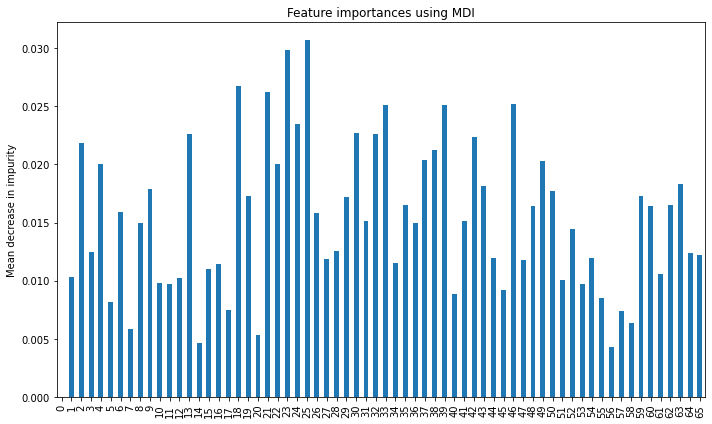

In [13]:
importances = model.feature_importances_

# feature_names = [X.columns[i] for i in range(X.shape[1])]
feature_names = [str(i) for i in range(X.shape[1])]

forest_importances = pd.Series(importances, index=feature_names)
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
fig, ax = plt.subplots(1,1, figsize=(10, 6))
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [14]:
# model.get_params()